In [1]:
from methods.config import *
from methods.model_results import best_models
from methods.plot import plot_fund_forecast, plot_example_results
from methods.fund_forecast import forecast_fund_value
from methods.analyse_hypertune import hypertune_best_results, aggregate_hypertune_results, hypertune_best_fixed_params, hypertune_best_variable_params

C:\Users\zhufe\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
best_models[0]['period']

{'start': 1960, 'end': 2019}

In [2]:
best_results, best_results_detailed = hypertune_best_results(best_models)
best_results['After GFC']

CPIAUCSL                 GS5              UNRATE                 RPI  \
         Val      Test       Val      Test       Val      Test       Val   
1   0.878240  0.909009  0.701592  0.890777  0.526358  0.915063  0.965091   
3   0.971813  0.981608  0.805651  0.882051  0.586765  0.893279  0.962302   
6   0.934918  0.999913  0.905069  0.926600  0.707056  0.906845  0.976952   
12  0.960151  0.993910  0.850959  0.922586  0.695343  0.874718  0.995411   
24  0.995615  1.006927  0.956373  0.941752  0.647261  0.915449  0.996356   

              
        Test  
1   0.774455  
3   0.553799  
6   0.781500  
12  0.806587  
24  0.967381

In [3]:
aggregate_results = aggregate_hypertune_results(best_results)
aggregate_results

CPIAUCSL                 GS5              UNRATE                 RPI  \
         Val      Test       Val      Test       Val      Test       Val   
1   0.984347  0.898869  0.591895  0.838774  0.482111  0.632876  0.763114   
3   0.955584  0.935117  0.660581  0.778126  0.430465  0.730321  0.833069   
6   0.945117  0.950333  0.727928  0.784762  0.515853  0.785184  0.948412   
12  0.947001  0.998069  0.707400  0.858017  0.676862  0.832507  0.940998   
24  0.990184  0.999717  0.817665  0.887258  0.548287  0.802140  0.976874   

              
        Test  
1   0.880210  
3   0.831589  
6   0.902717  
12  0.891806  
24  0.951256

In [4]:
number_of_pca = hypertune_best_fixed_params(best_models, 'number_of_pca', 'Number of PCA')

In [5]:
look_back_years = hypertune_best_fixed_params(best_models, 'look_back_years', 'Look Back Years')

In [6]:
CNN_layers = hypertune_best_variable_params(best_models, 'CNN_layers', 'CNN Layers')

In [7]:
CNN_filters = hypertune_best_variable_params(best_models, 'CNN_0_filters', 'CNN Filters', ignore_0 = True)

In [8]:
LSTM_layers = hypertune_best_variable_params(best_models, 'LSTM_layers', 'LSTM Layers')

In [9]:
LSTM_units = hypertune_best_variable_params(best_models, 'LSTM_0_units', 'LSTM Neurons', ignore_0 = True)

In [10]:
Dense_layers = hypertune_best_variable_params(best_models, 'Dense_layers', 'Dense Layers')

In [11]:
Dense_units = hypertune_best_variable_params(best_models, 'Dense_0_units', 'Dense Neurons', ignore_0 = True)

# Examine Variable/Period

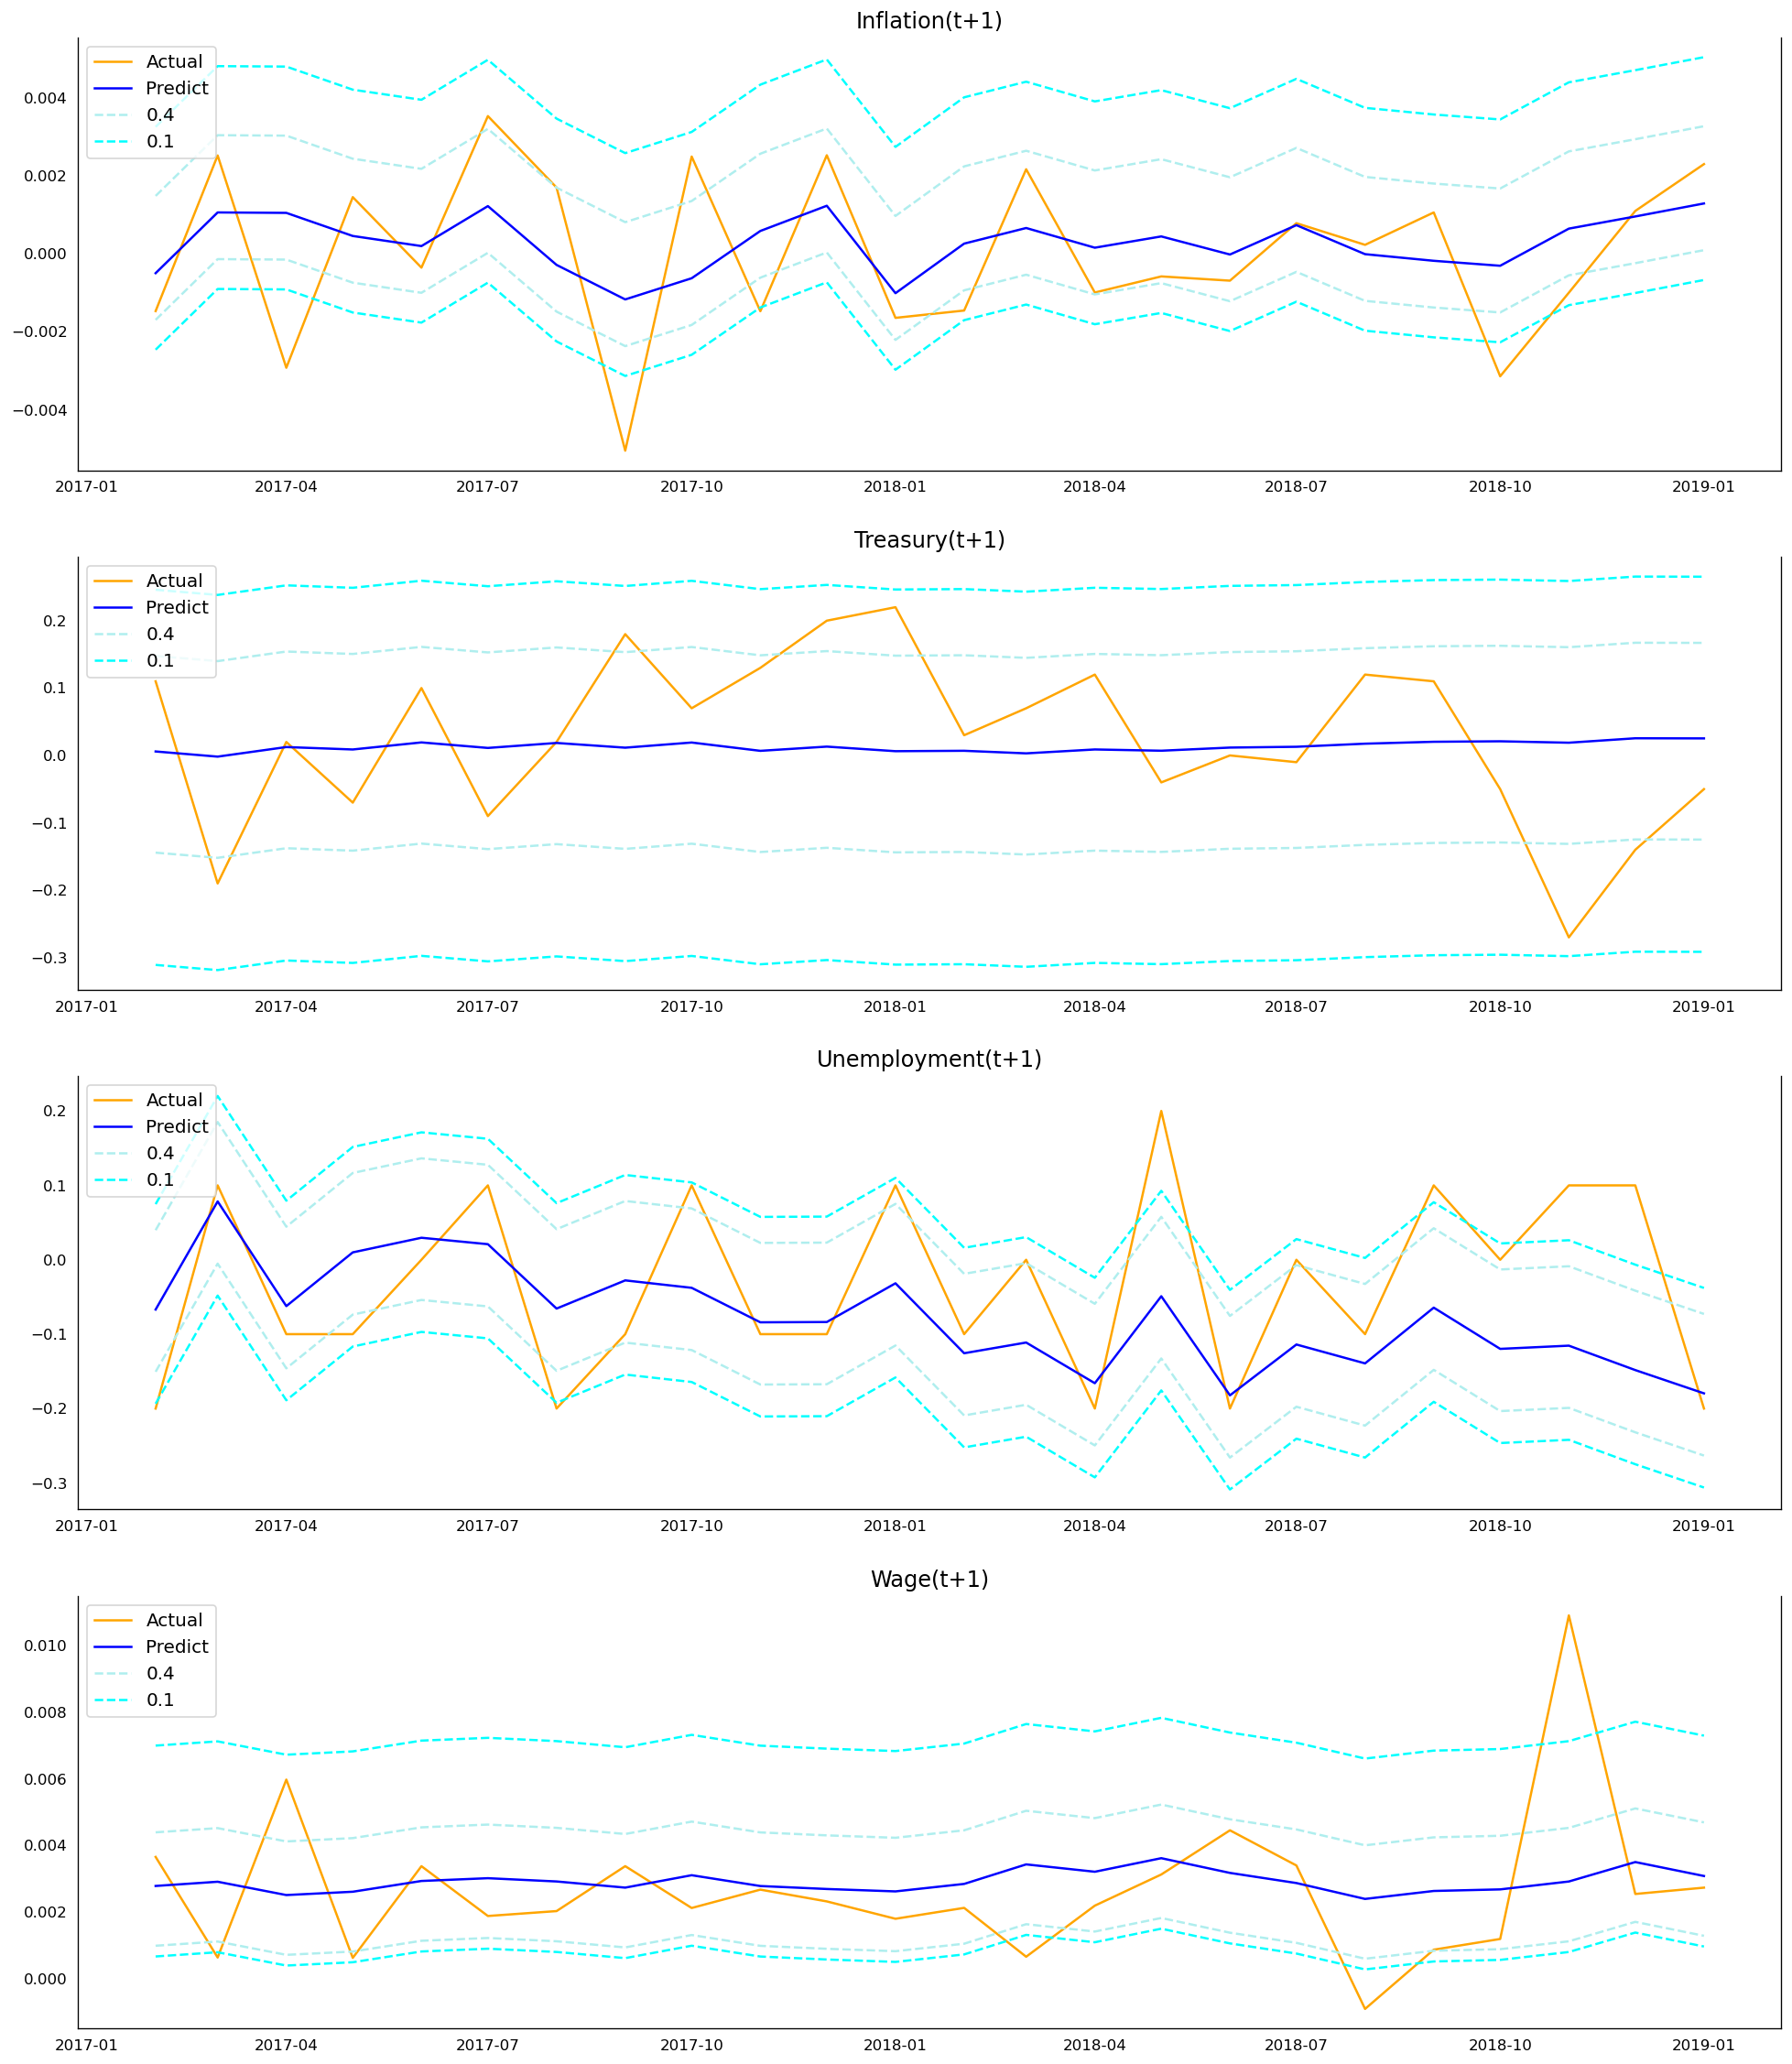

In [12]:
plot_example_results(best_results_detailed, 'During COVID', alphas=[0.4, 0.1], model='NN')

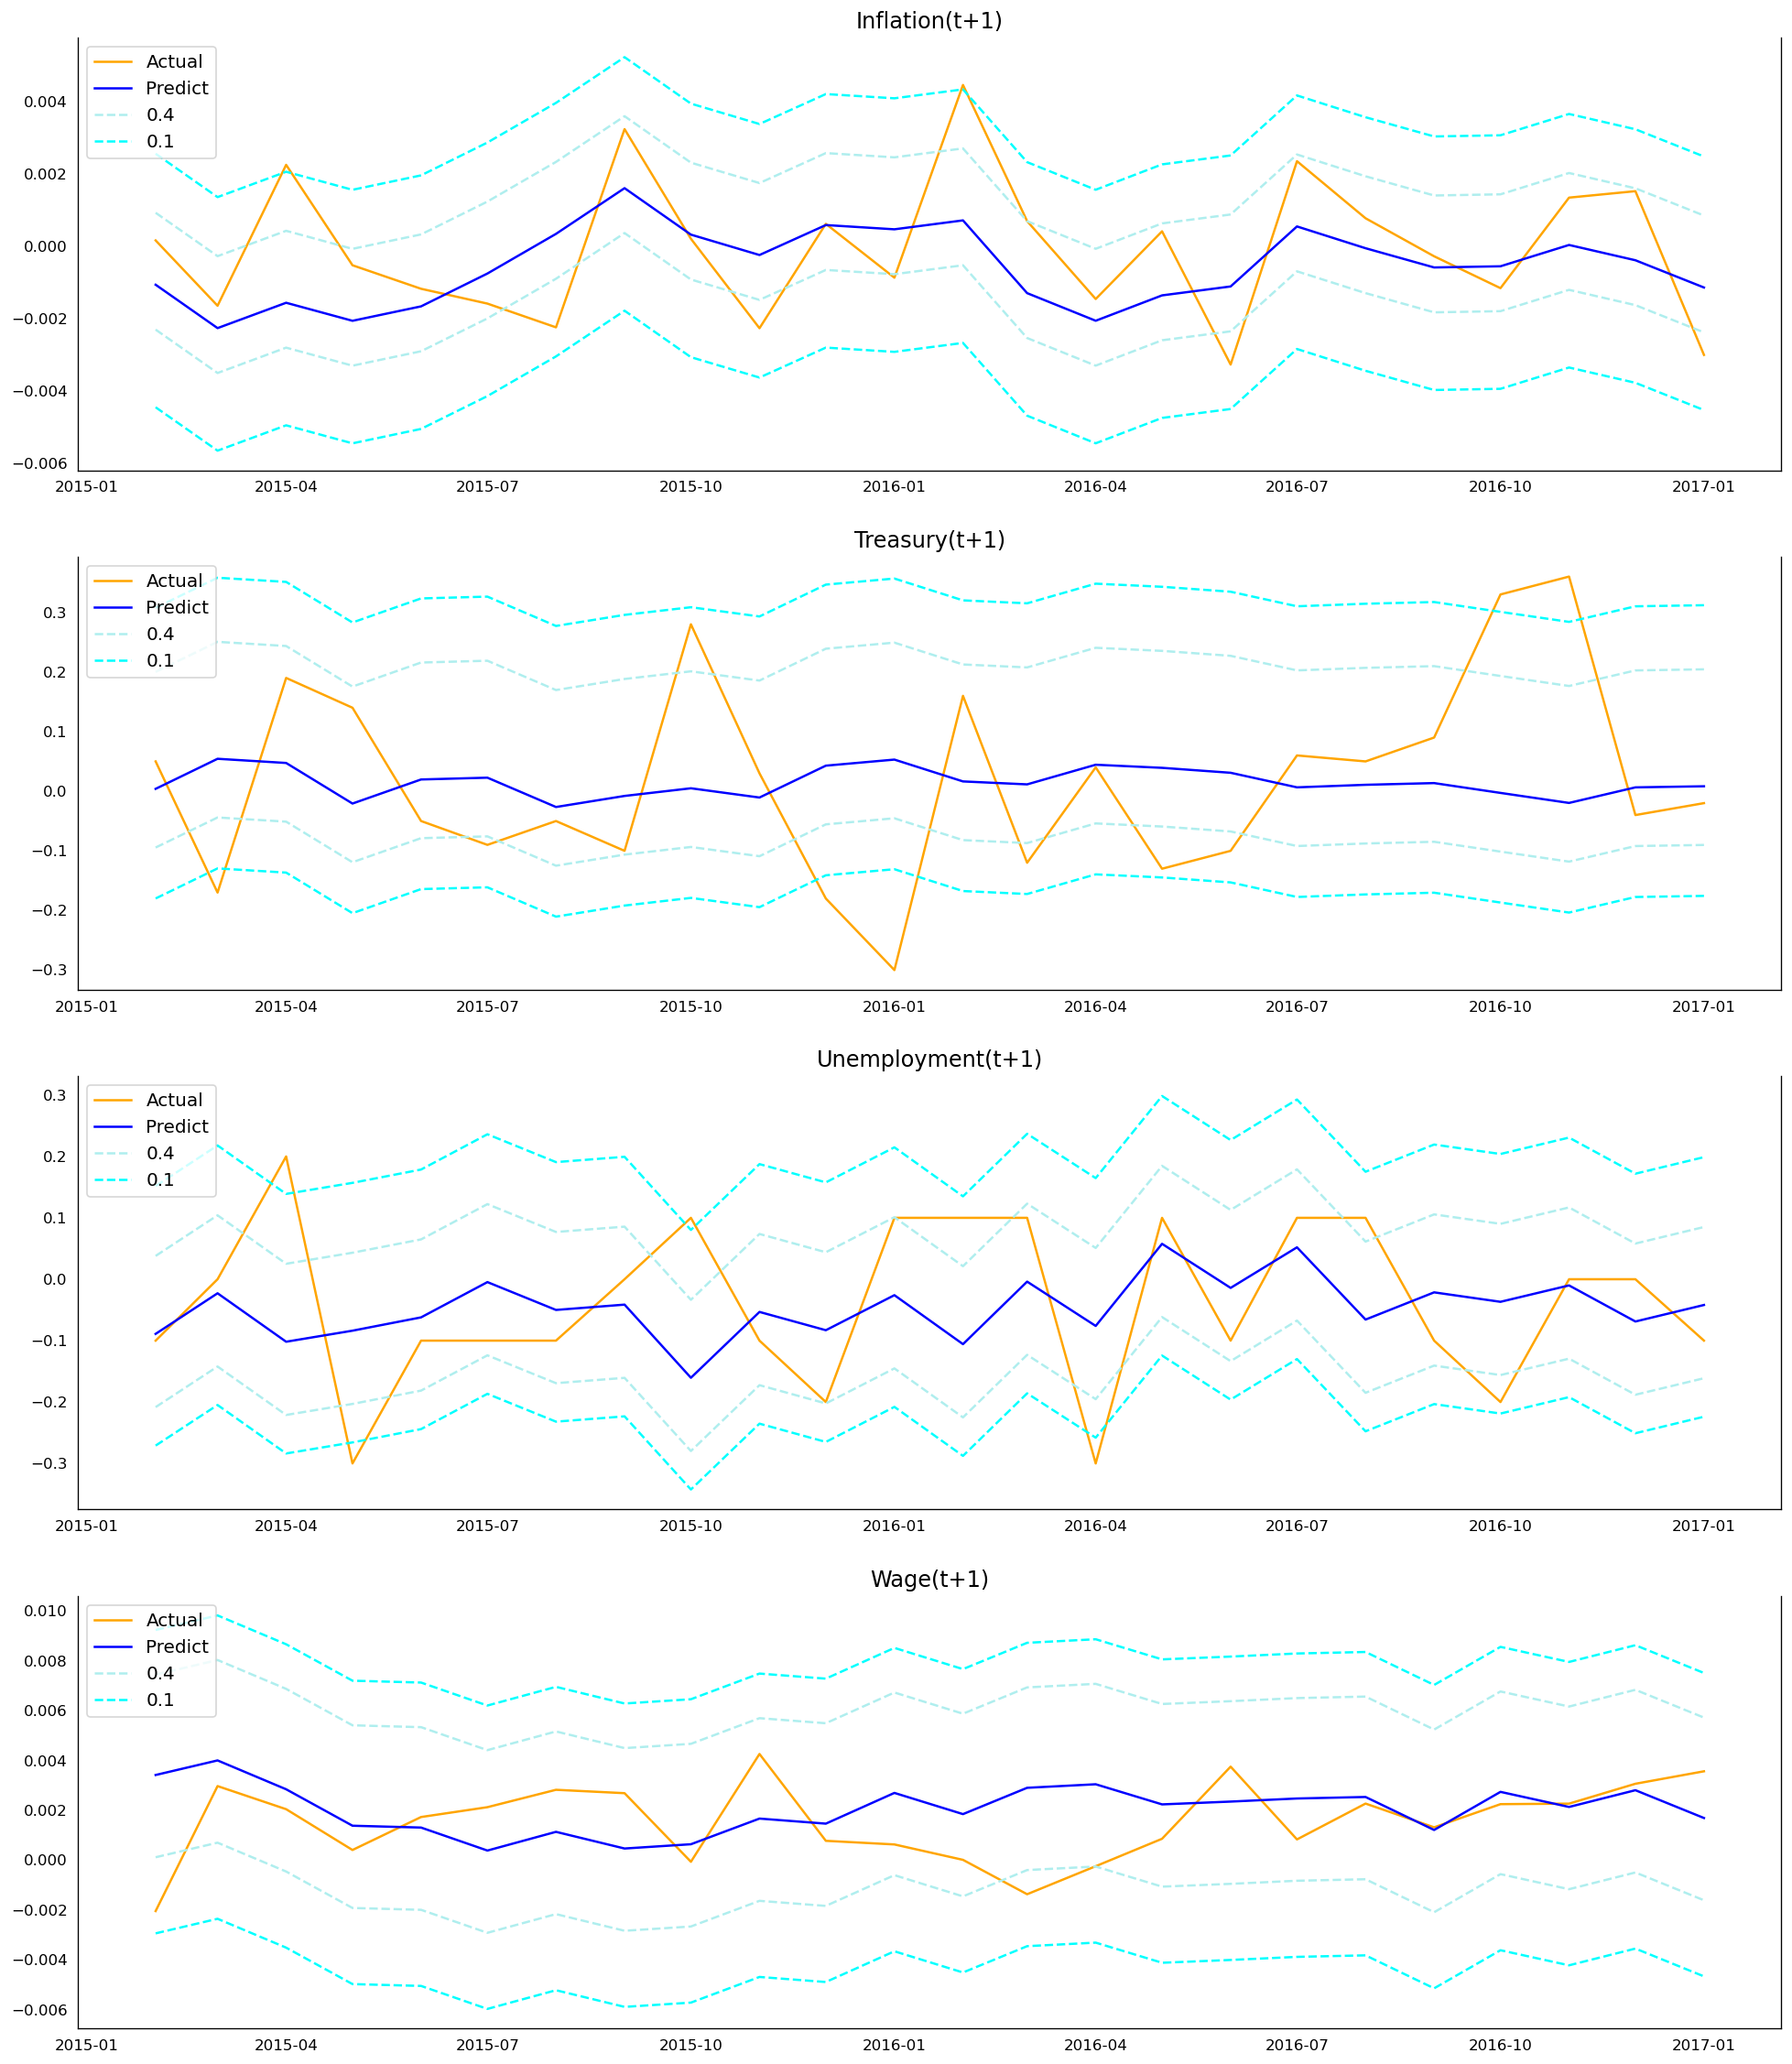

In [13]:
plot_example_results(best_results_detailed, 'After GFC', alphas=[0.4, 0.1], model='NN')

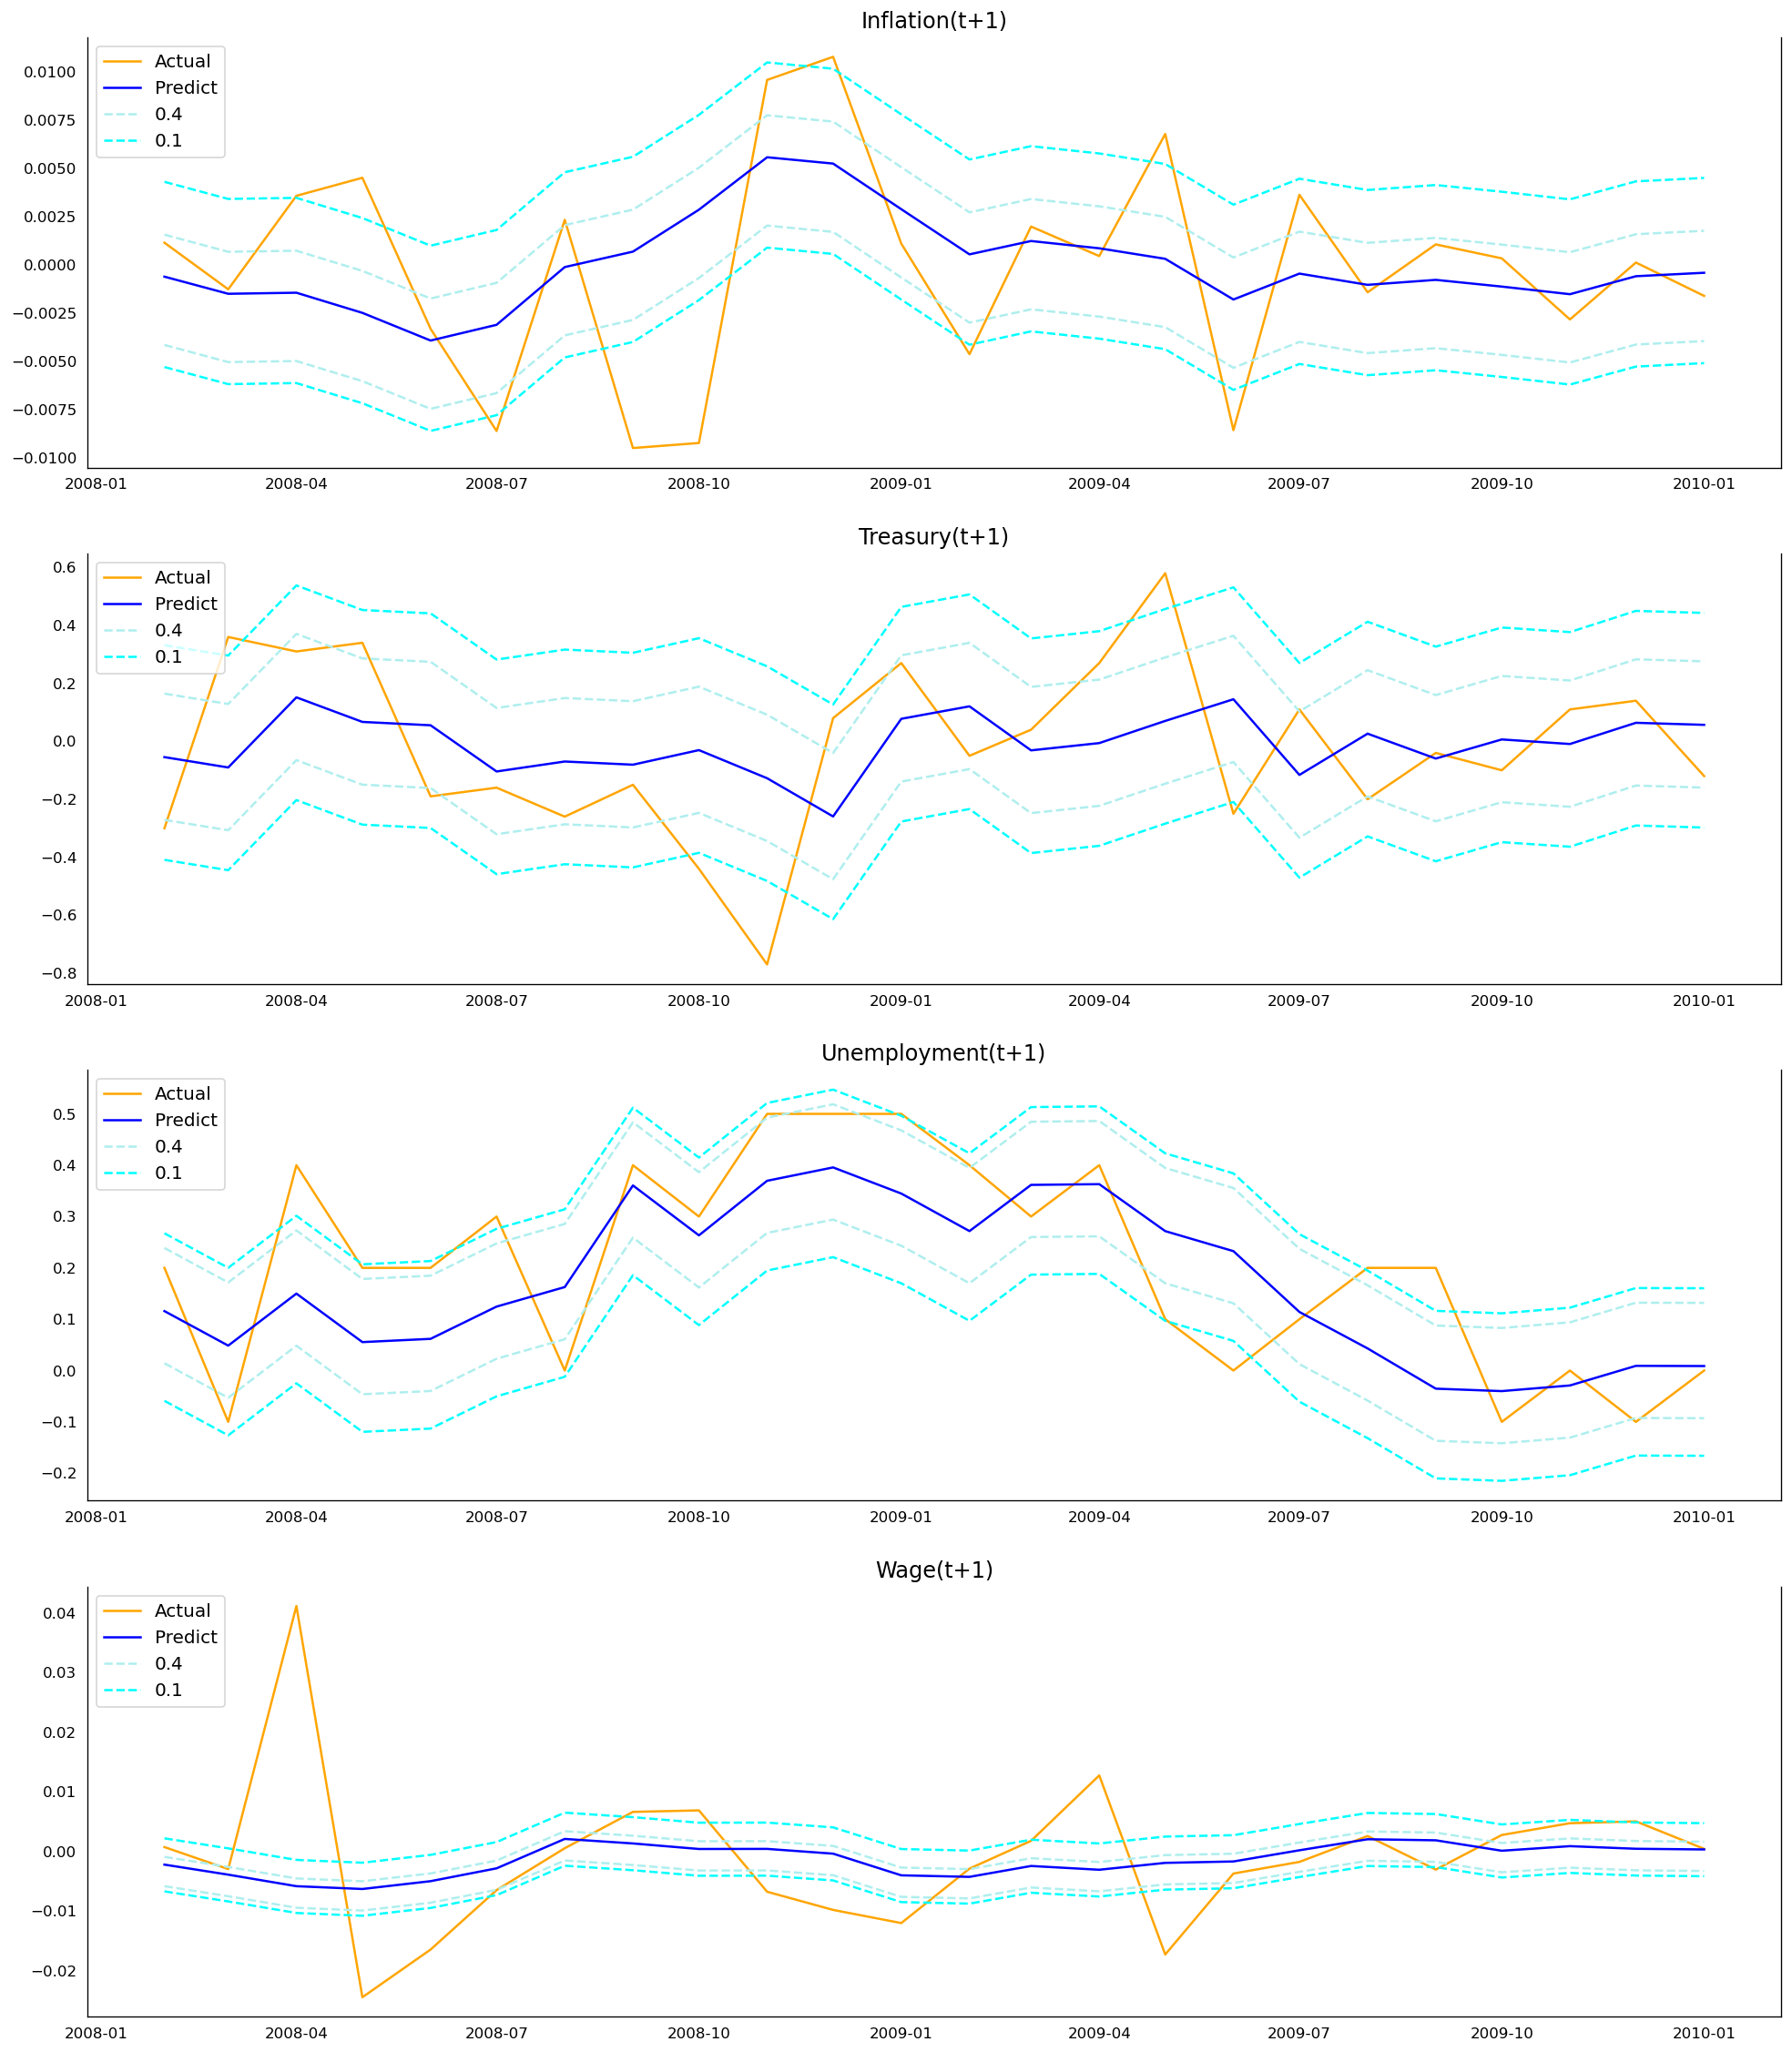

In [14]:
plot_example_results(best_results_detailed, 'During GFC', alphas=[0.4, 0.1], model='NN')

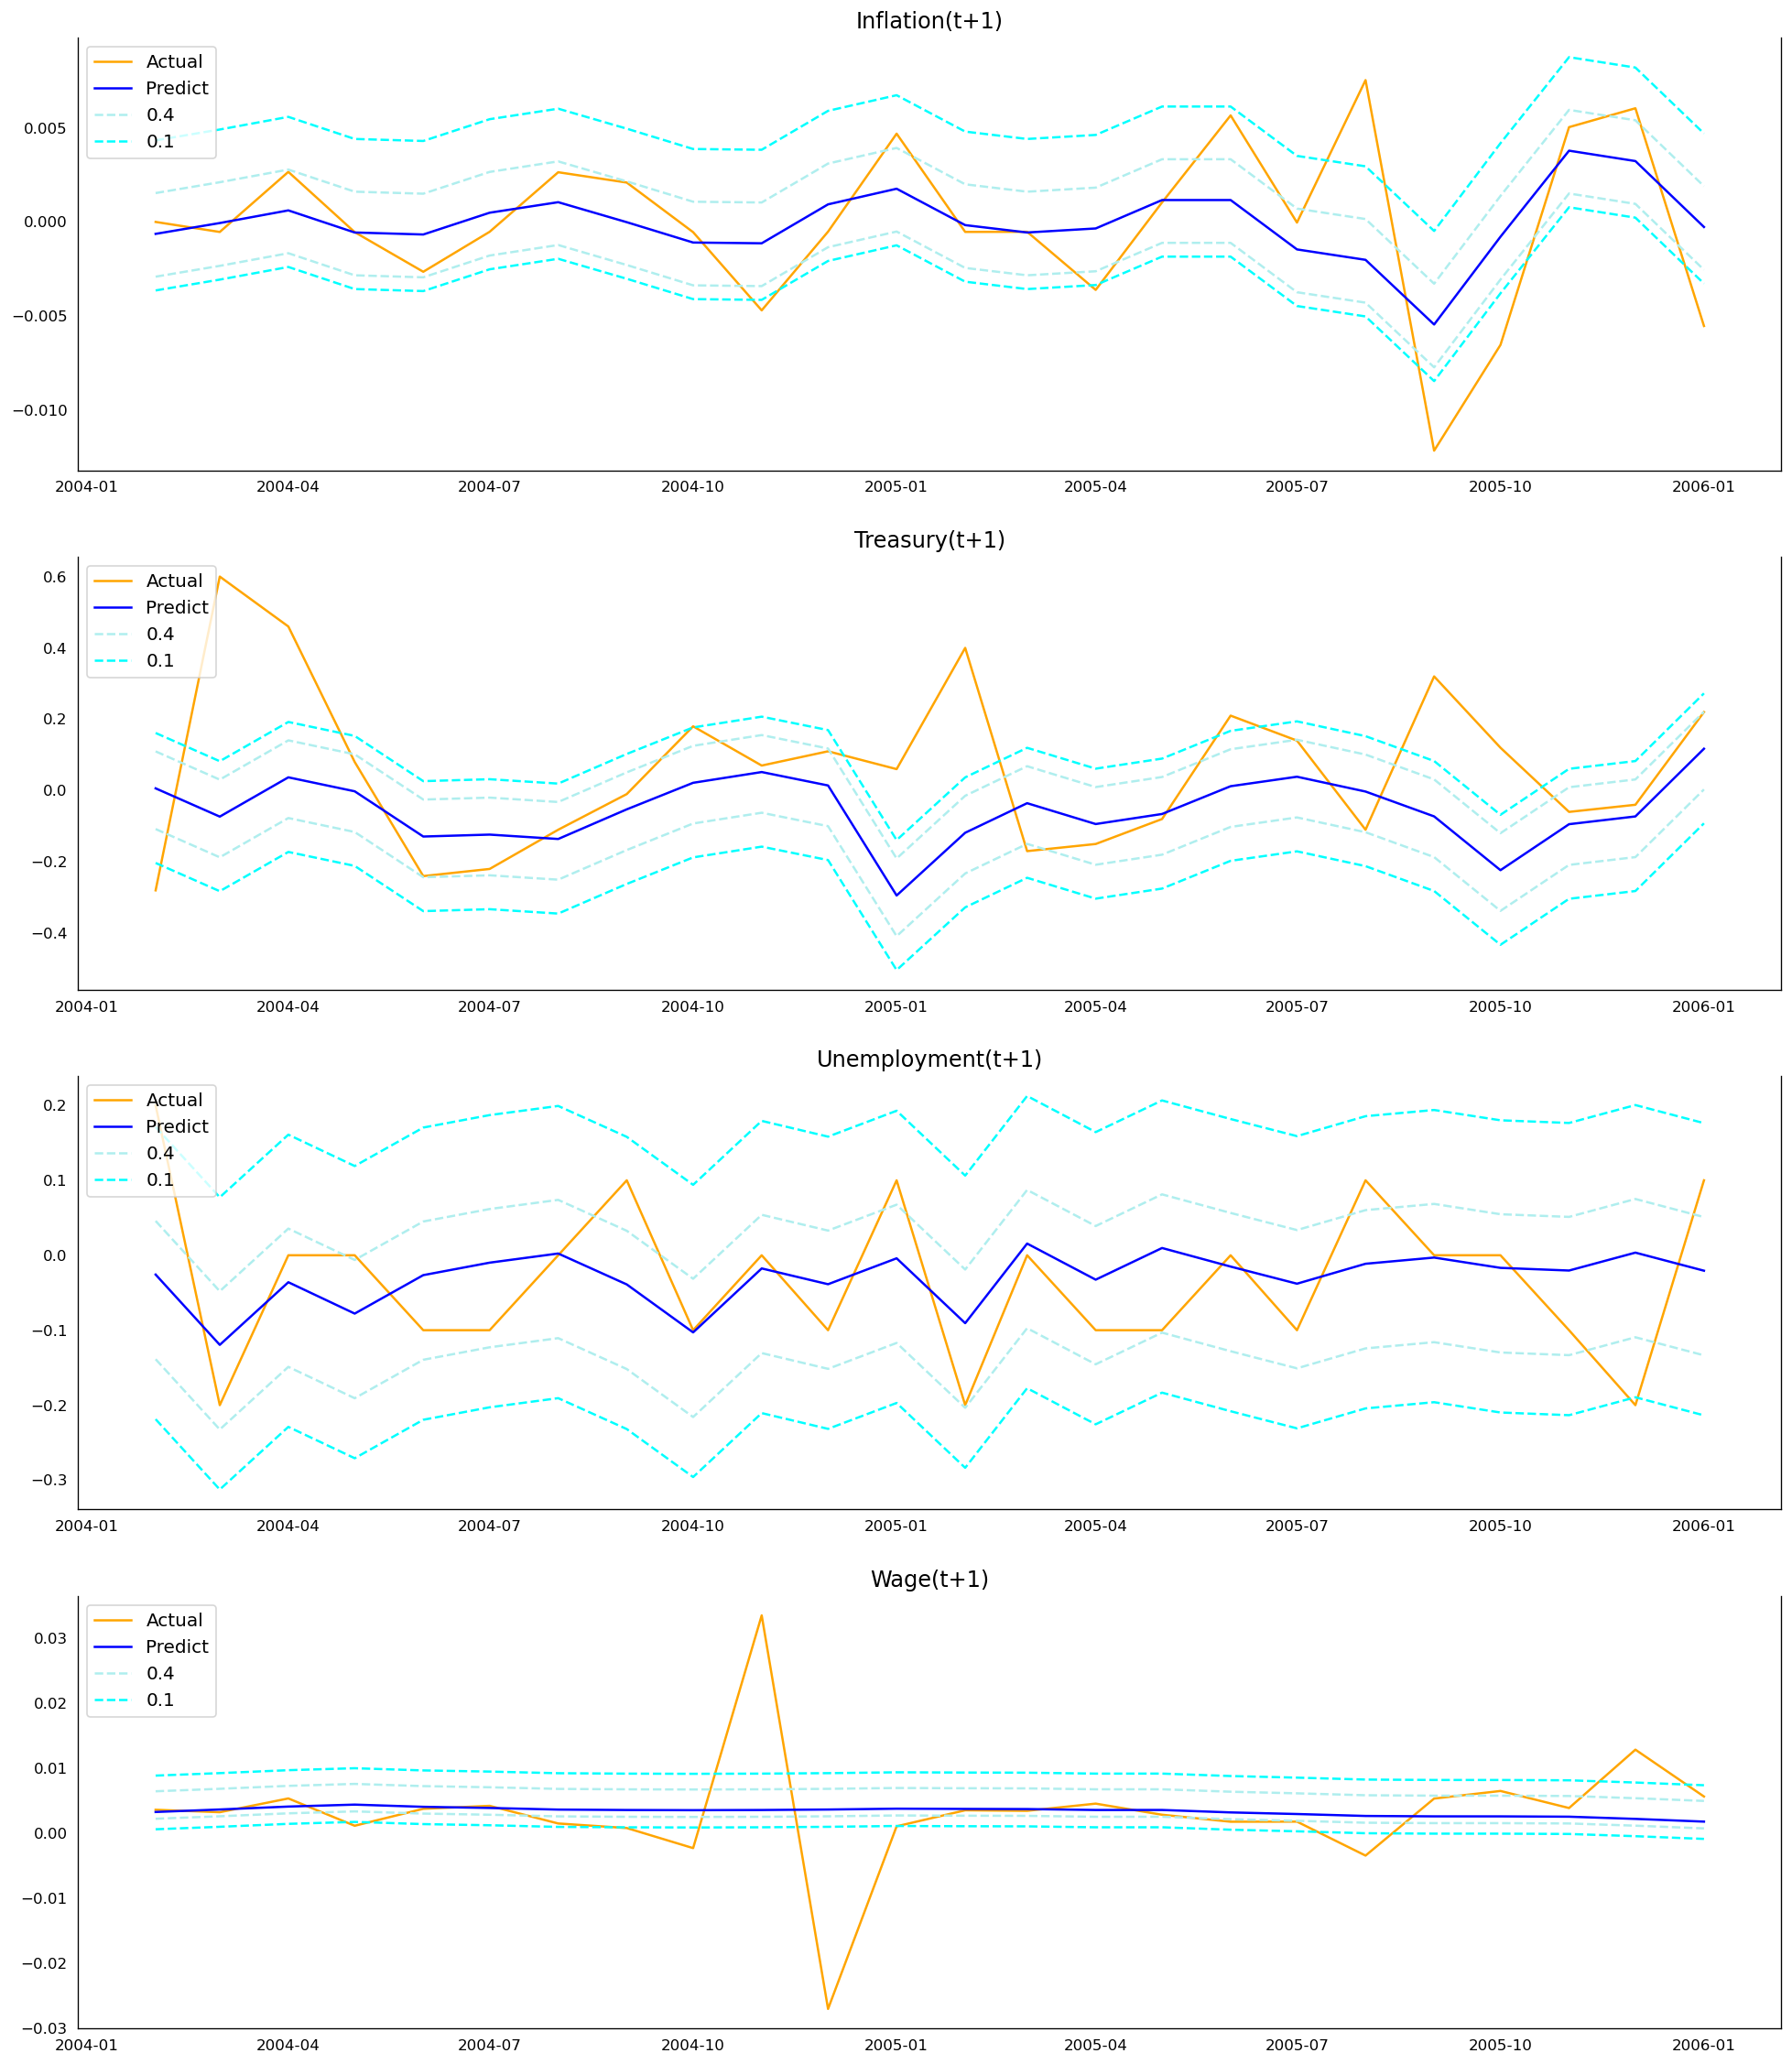

In [15]:
plot_example_results(best_results_detailed, 'Before GFC', alphas=[0.4, 0.1], model='NN')

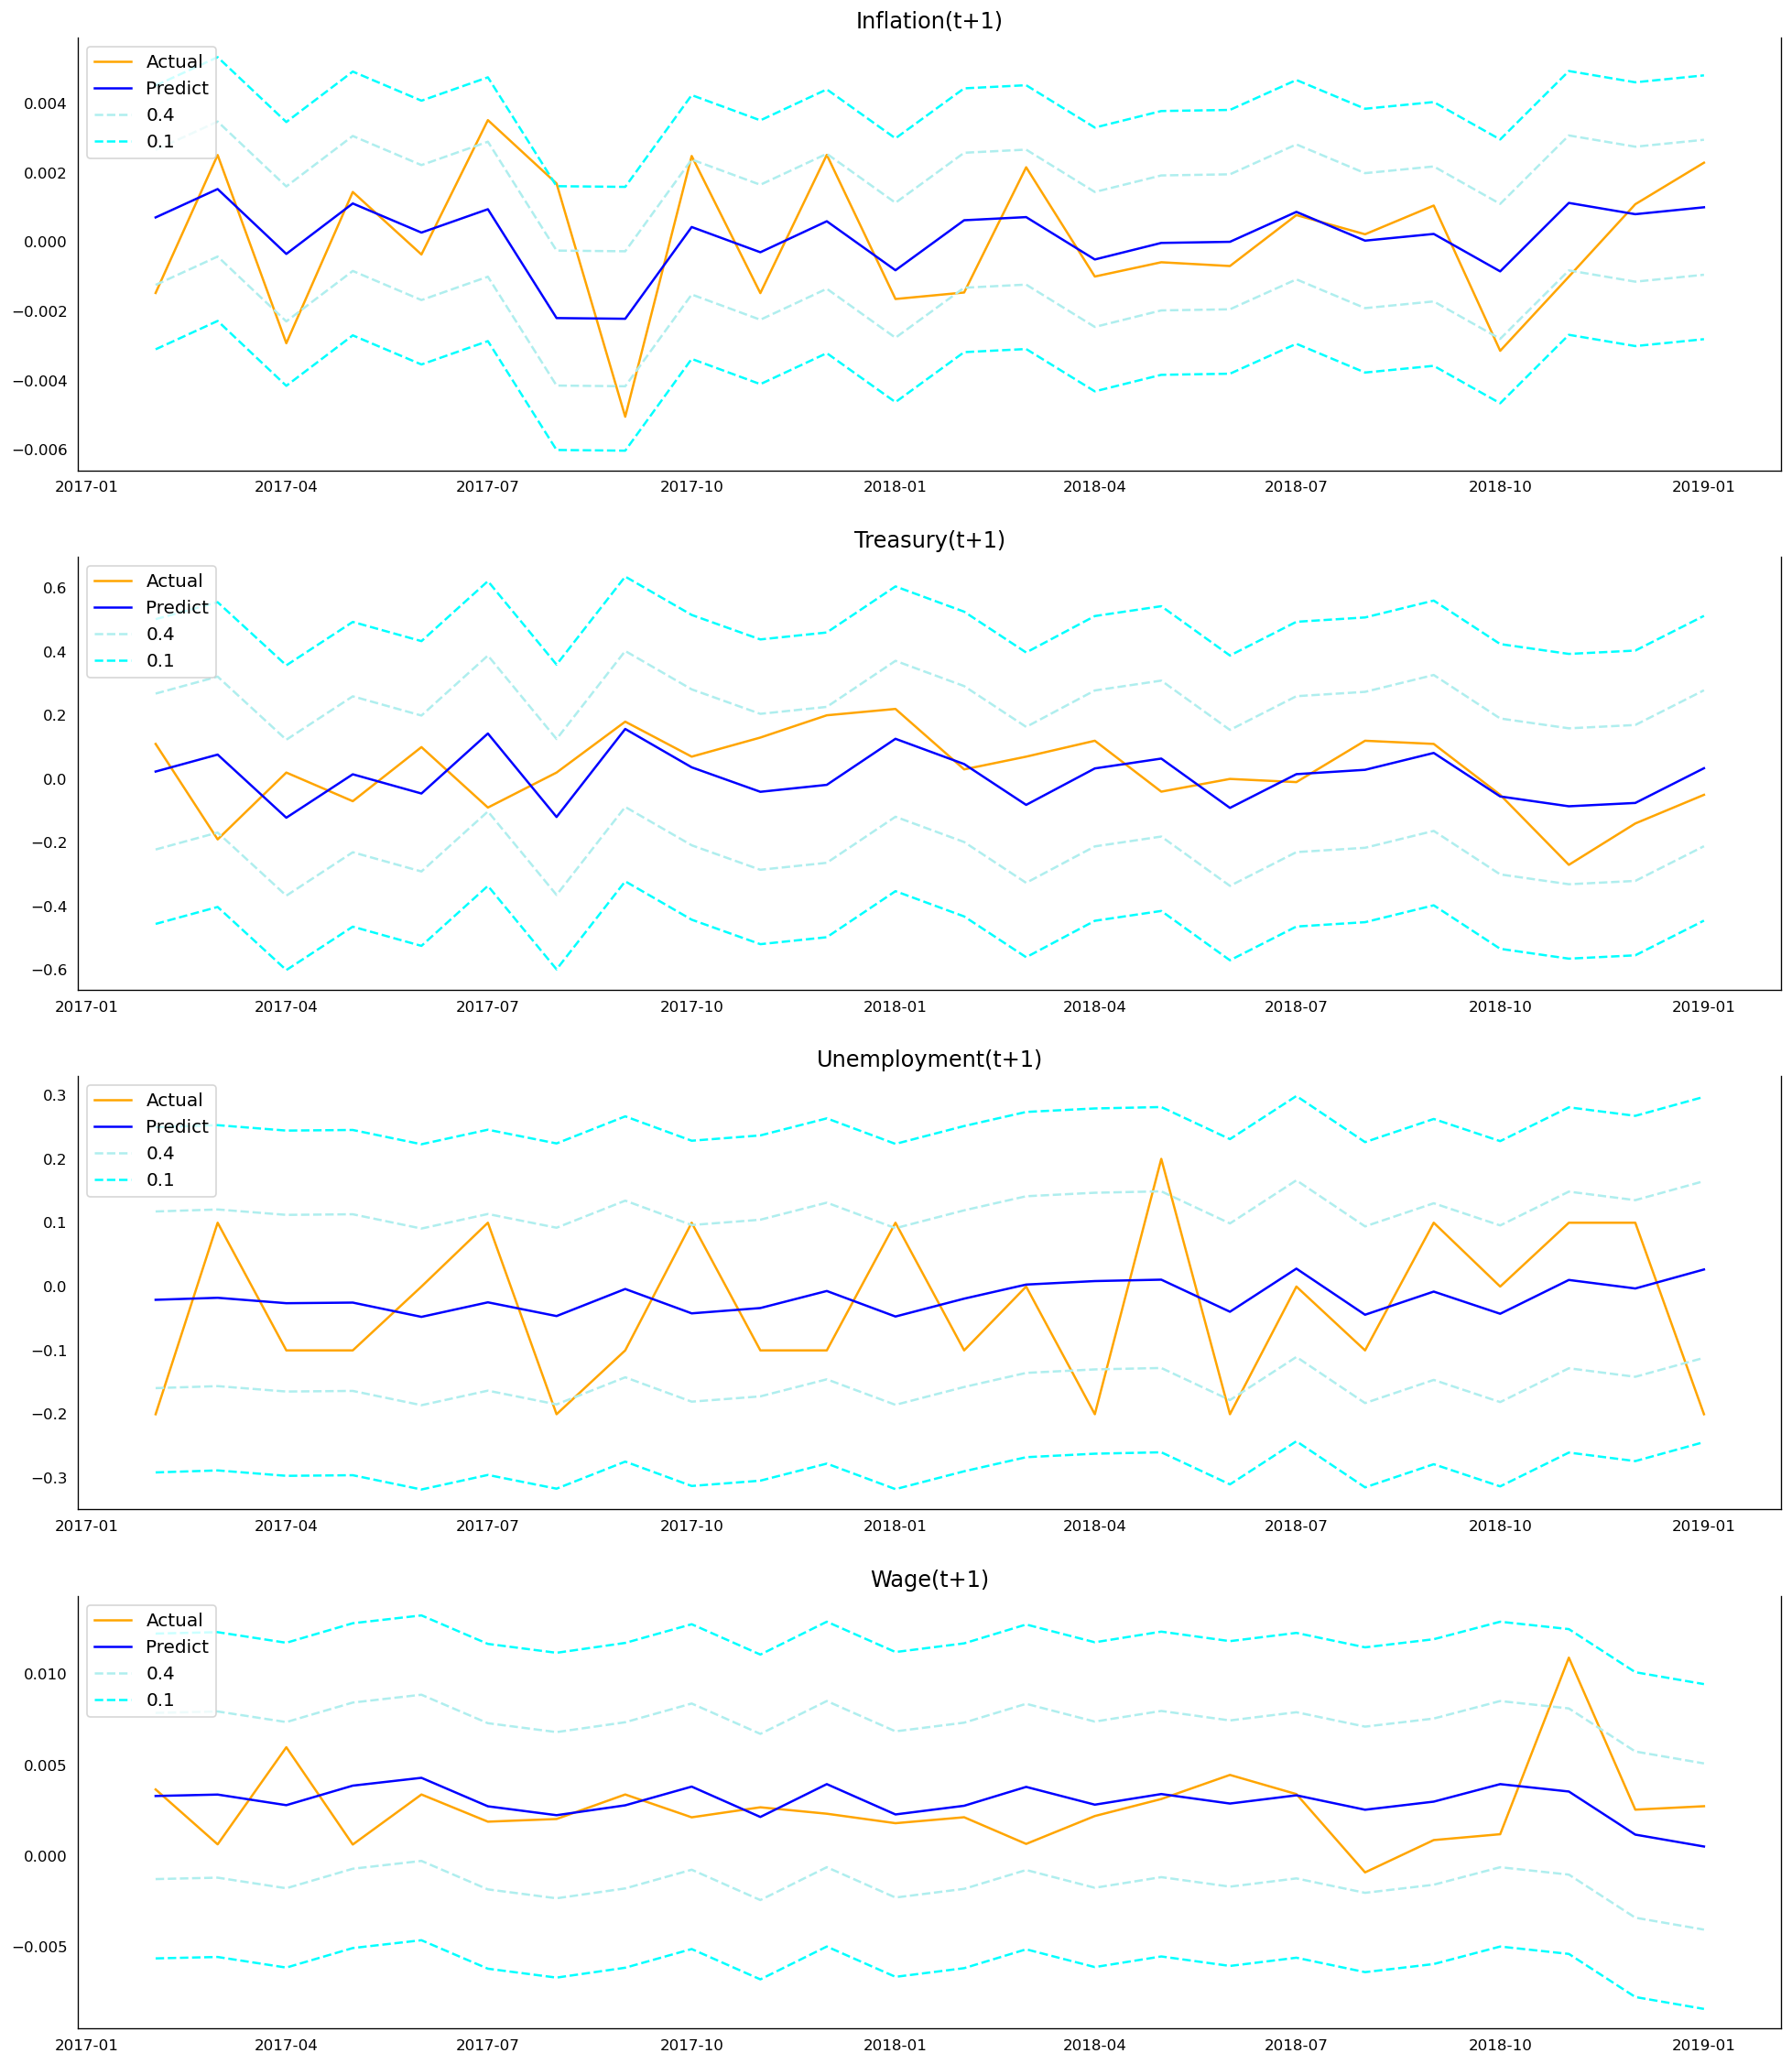

In [16]:
plot_example_results(best_results_detailed, 'During COVID', alphas=[0.4, 0.1], model='Var')

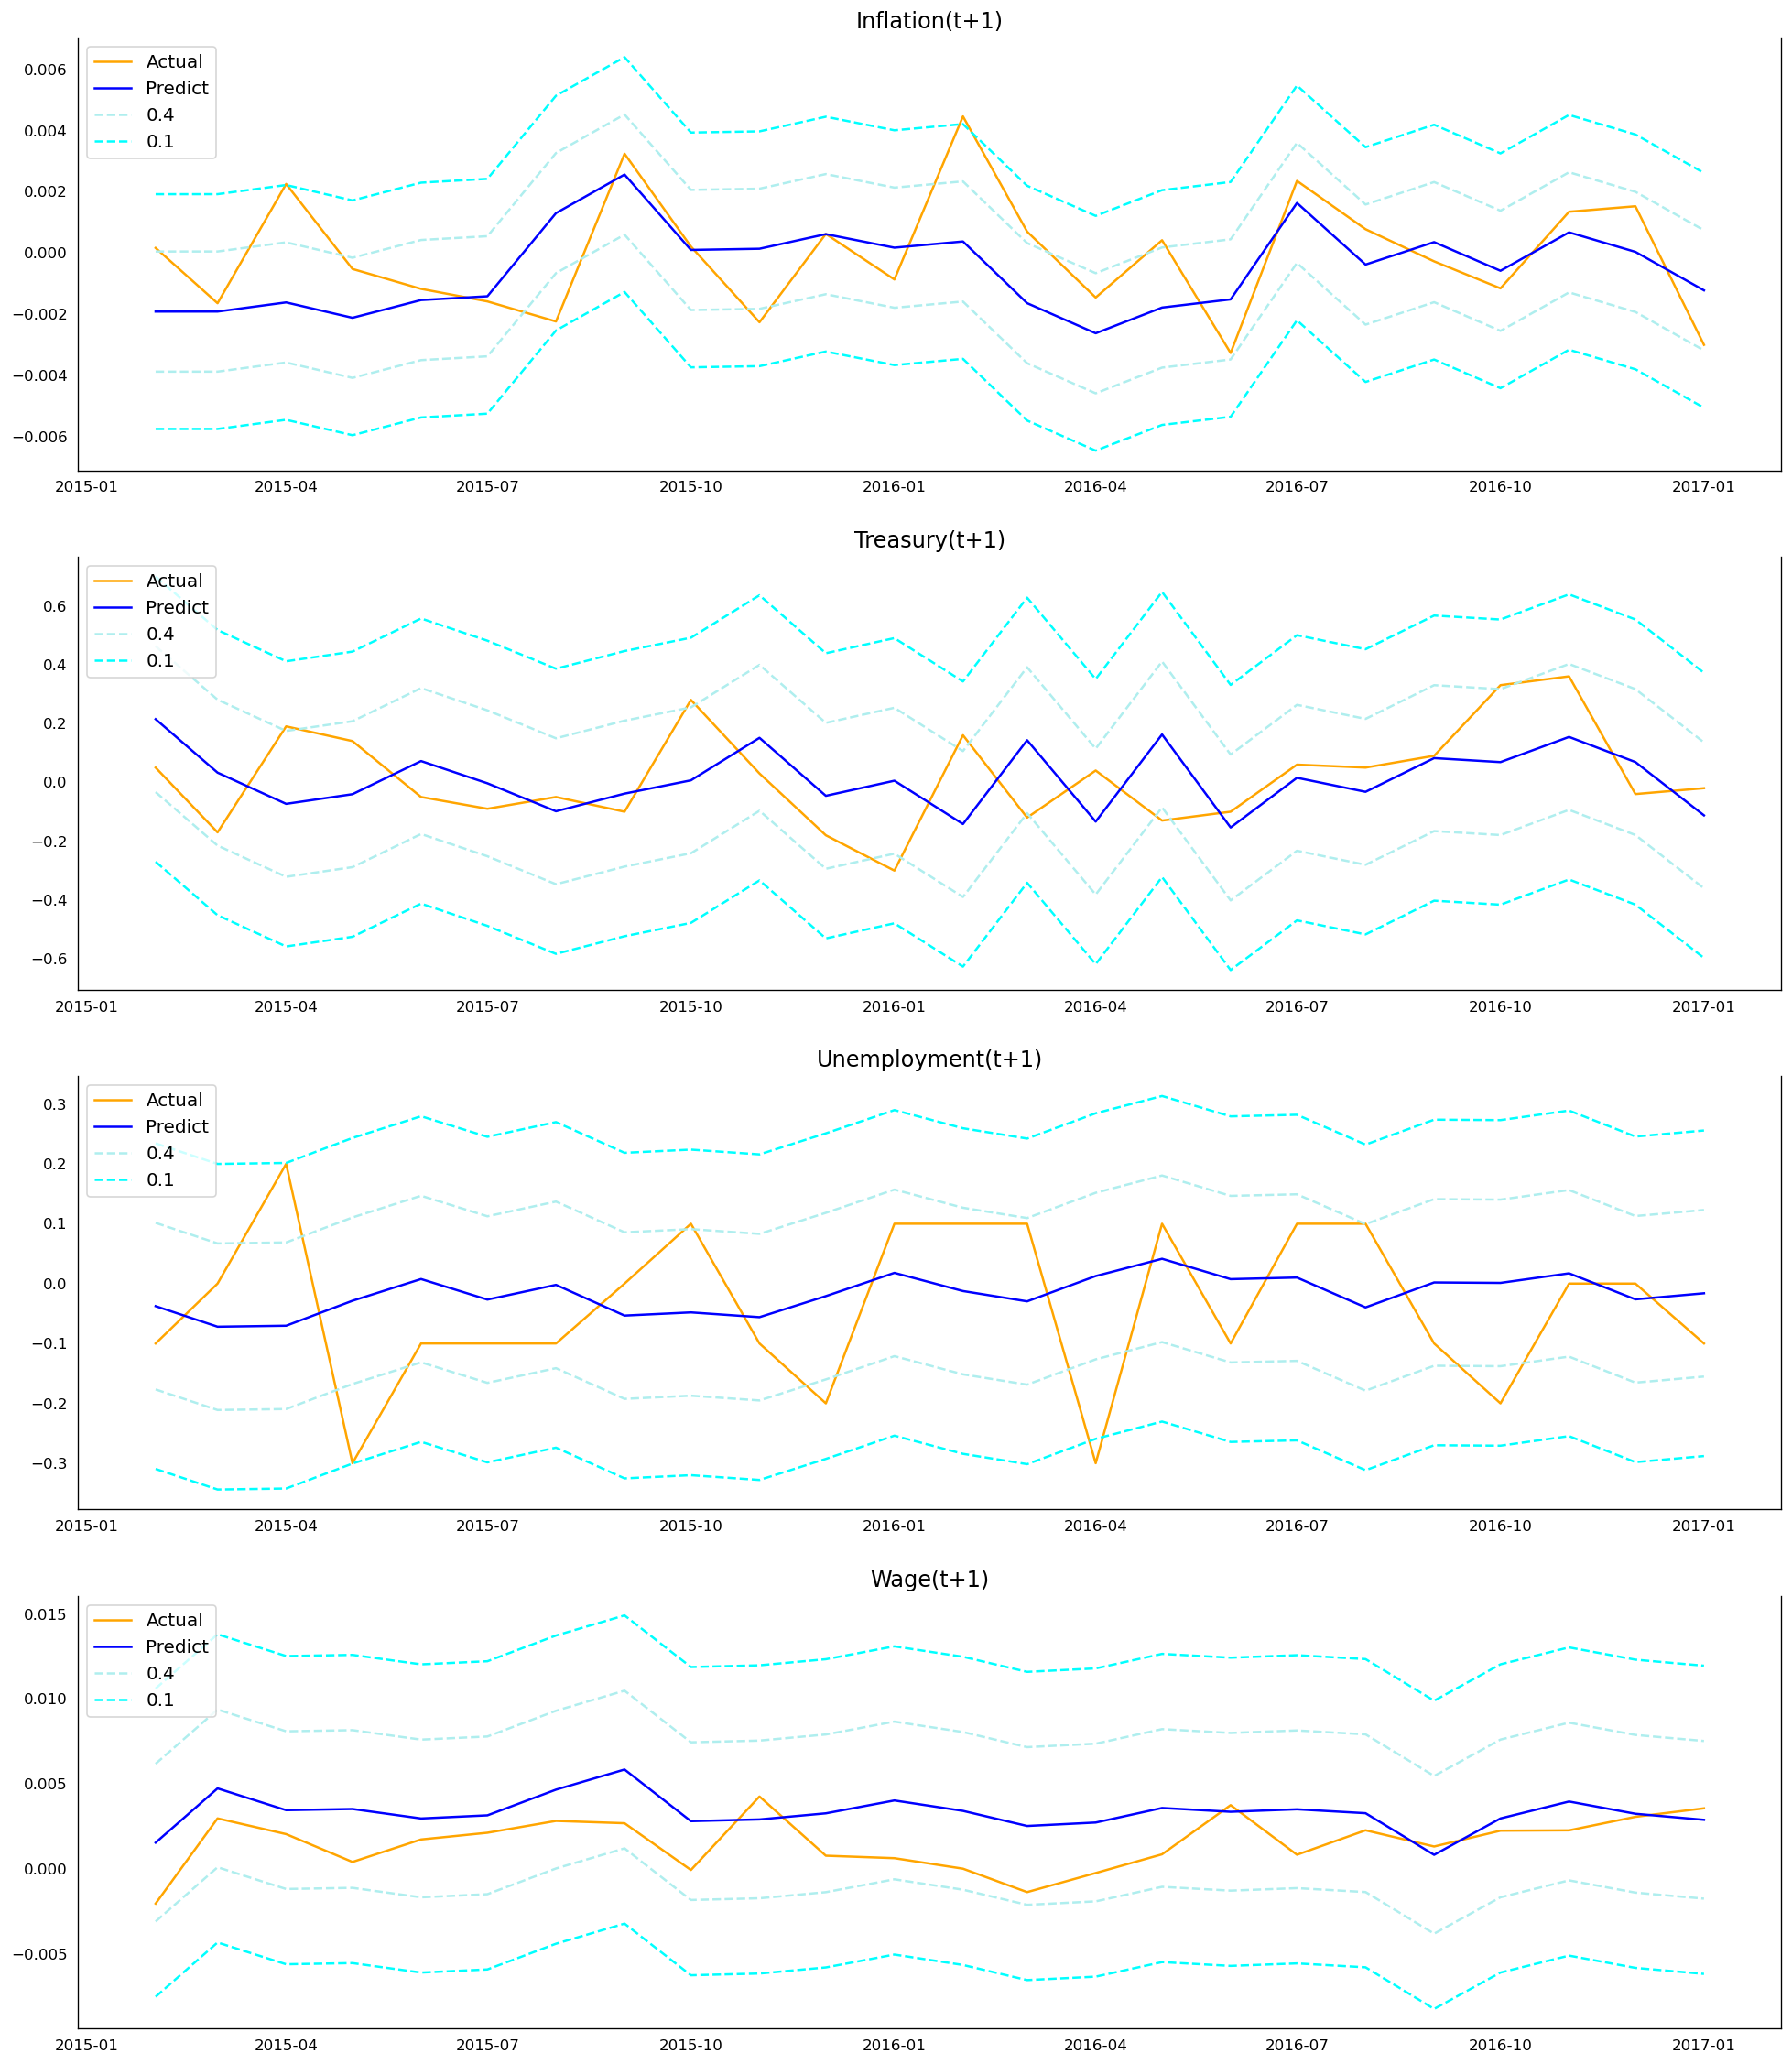

In [17]:
plot_example_results(best_results_detailed, 'After GFC', alphas=[0.4, 0.1], model='Var')

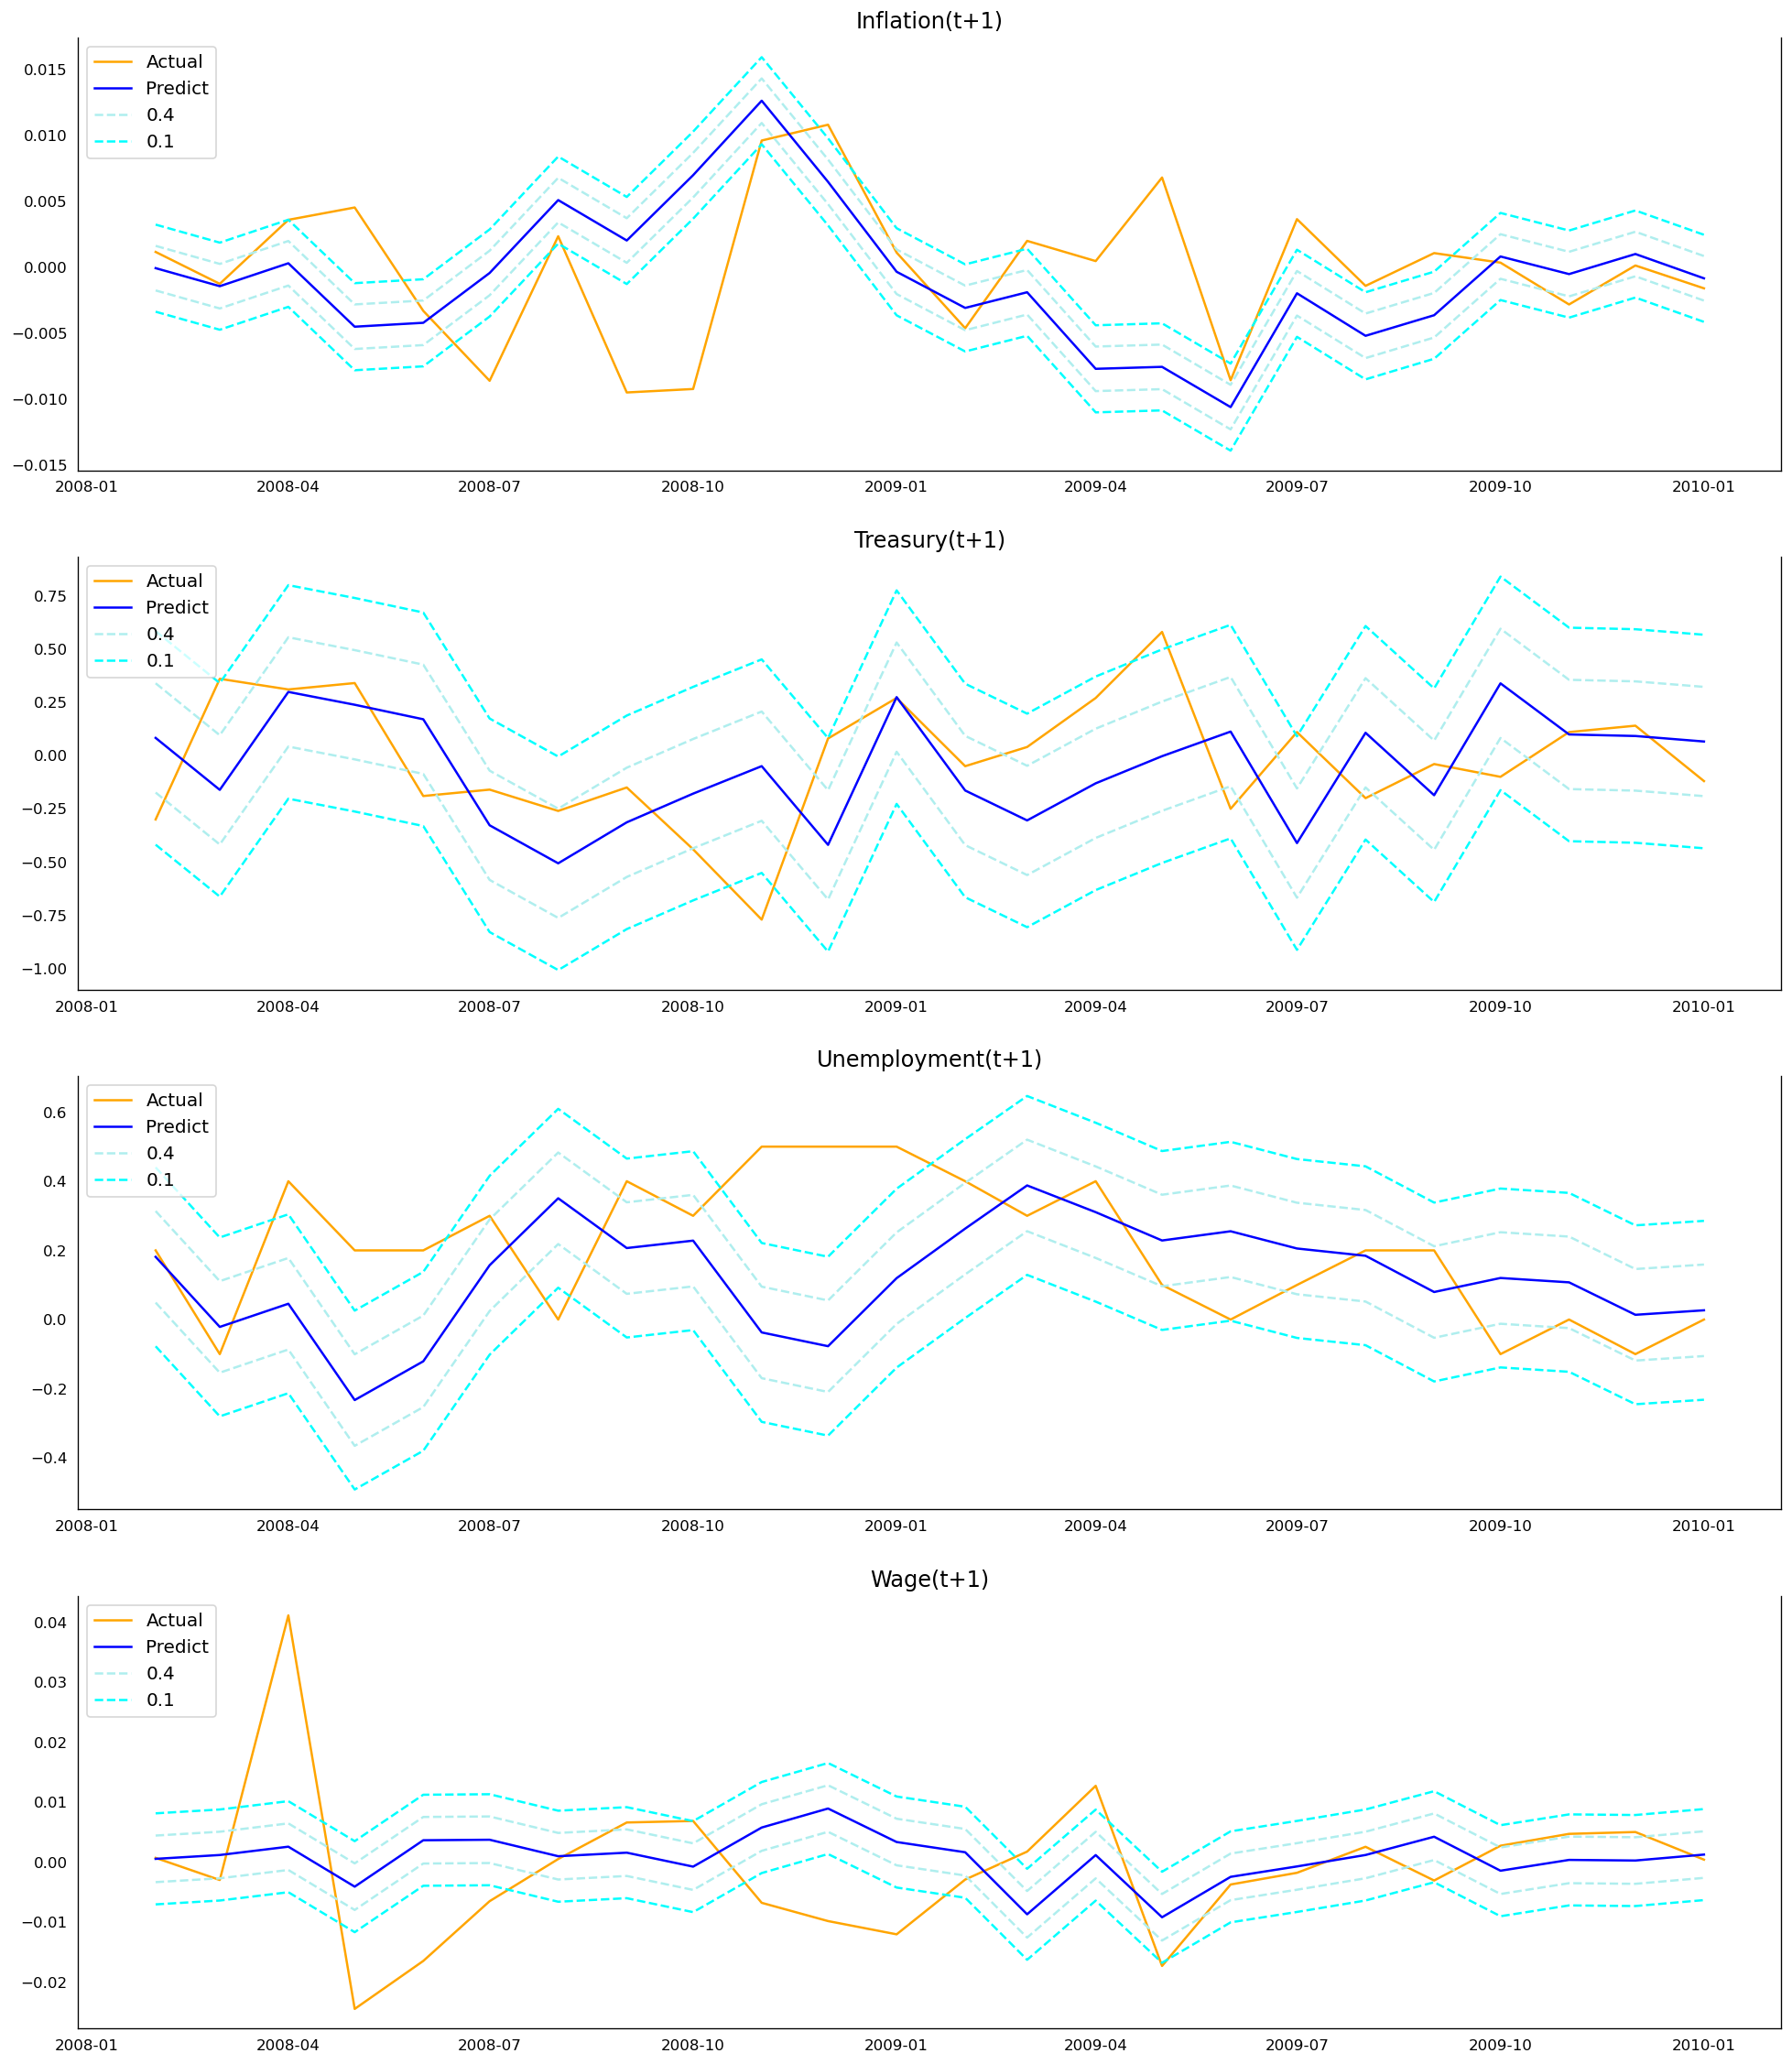

In [18]:
plot_example_results(best_results_detailed, 'During GFC', alphas=[0.4, 0.1], model='Var')

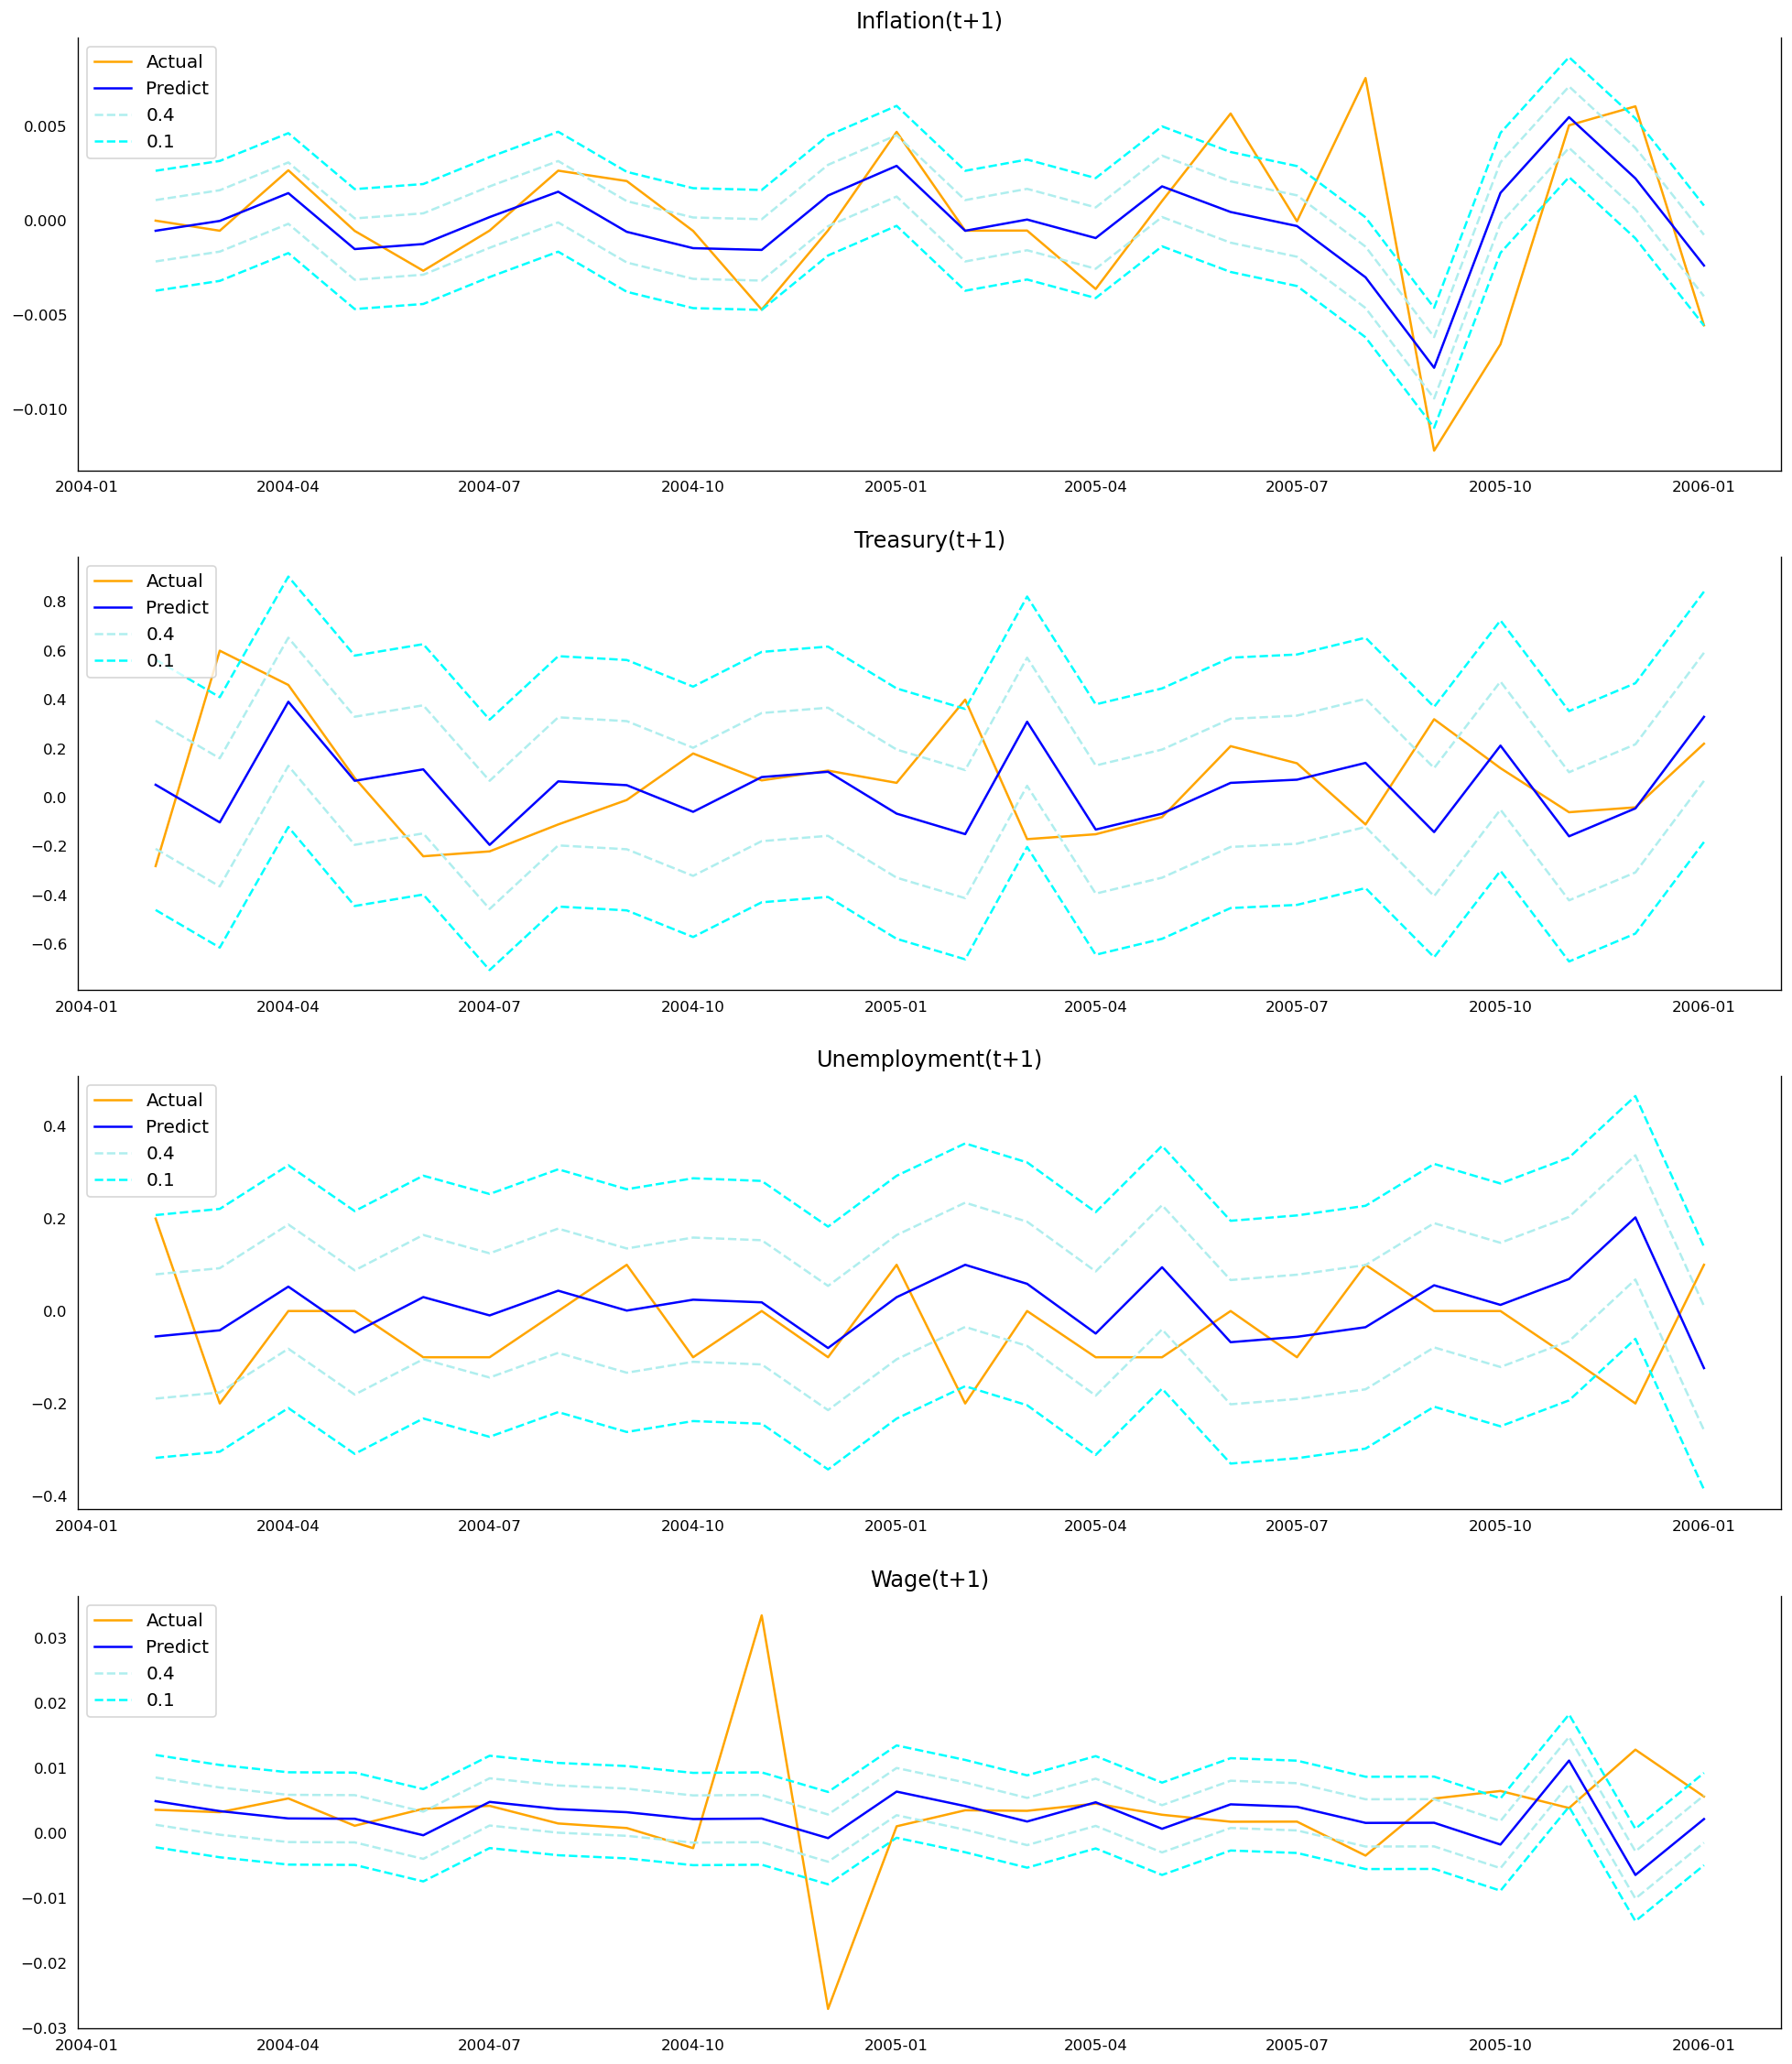

In [19]:
plot_example_results(best_results_detailed, 'Before GFC', alphas=[0.4, 0.1], model='Var')

# Fund Forecast

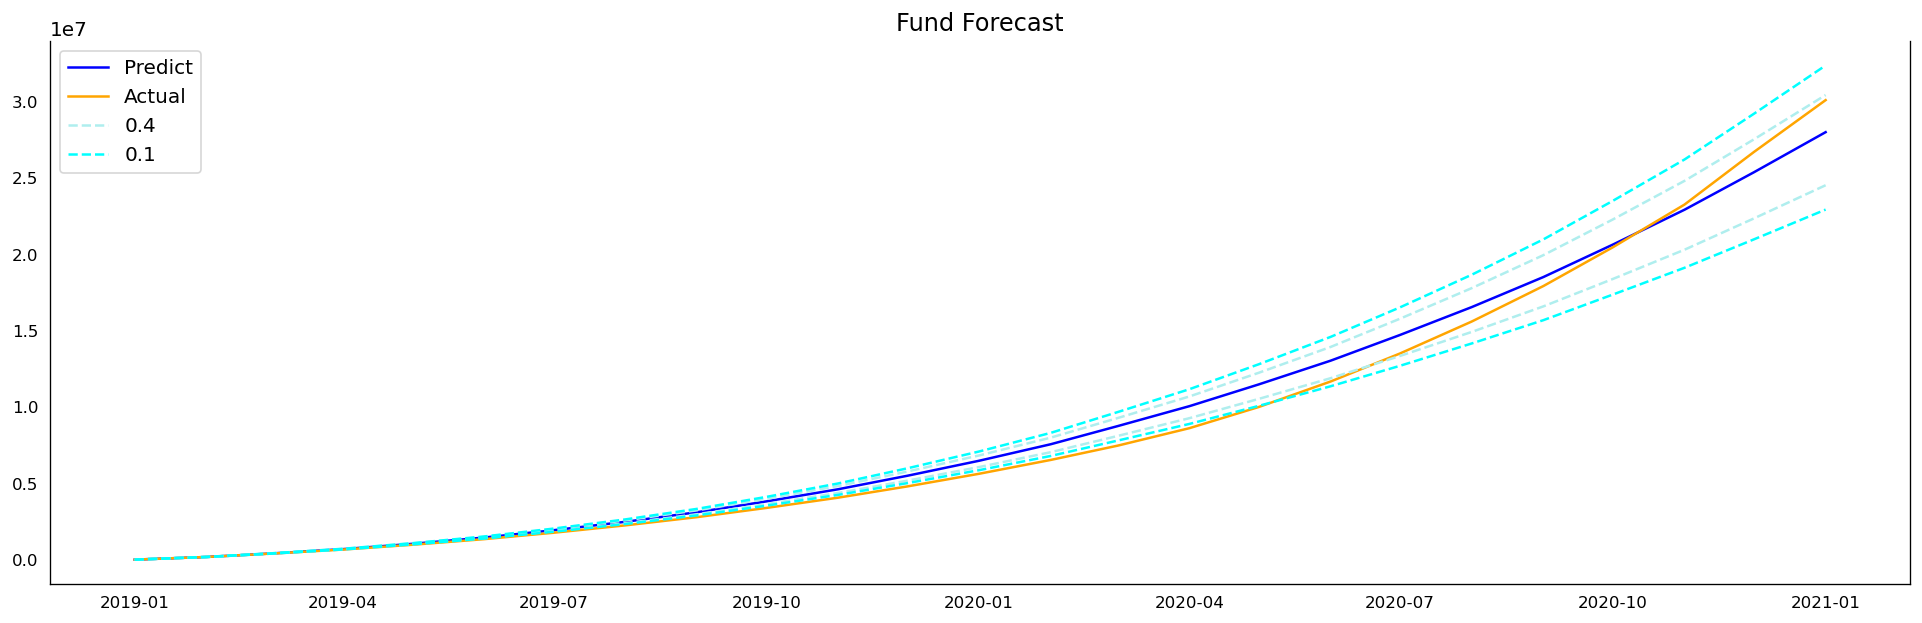

In [21]:
x = forecast_fund_value(best_results_detailed, period = 'During COVID', interval = True)
plot_fund_forecast(x, 'During COVID')

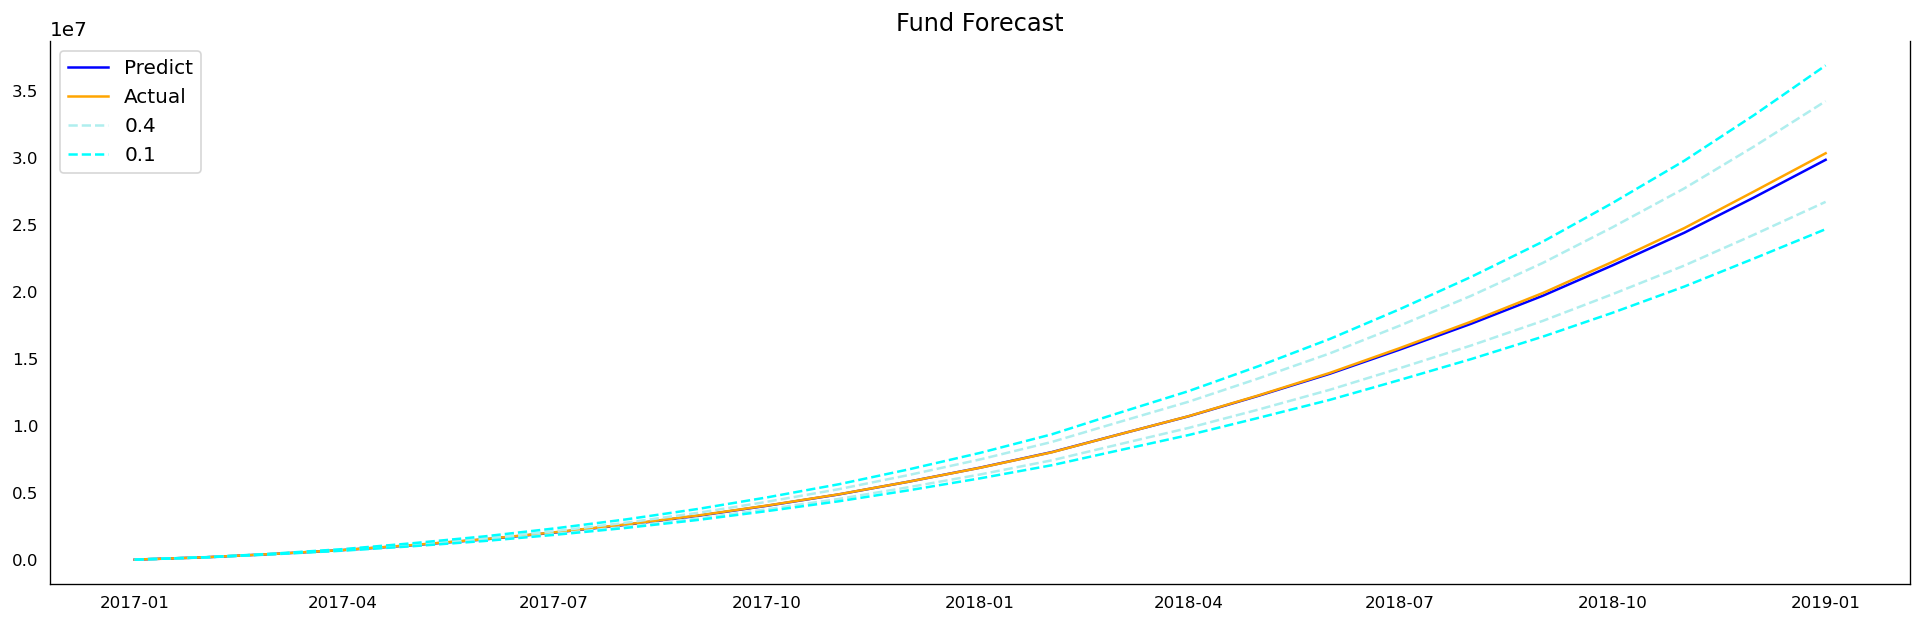

In [22]:
x = forecast_fund_value(best_results_detailed, period = 'After GFC', interval = True)
plot_fund_forecast(x, 'After GFC')

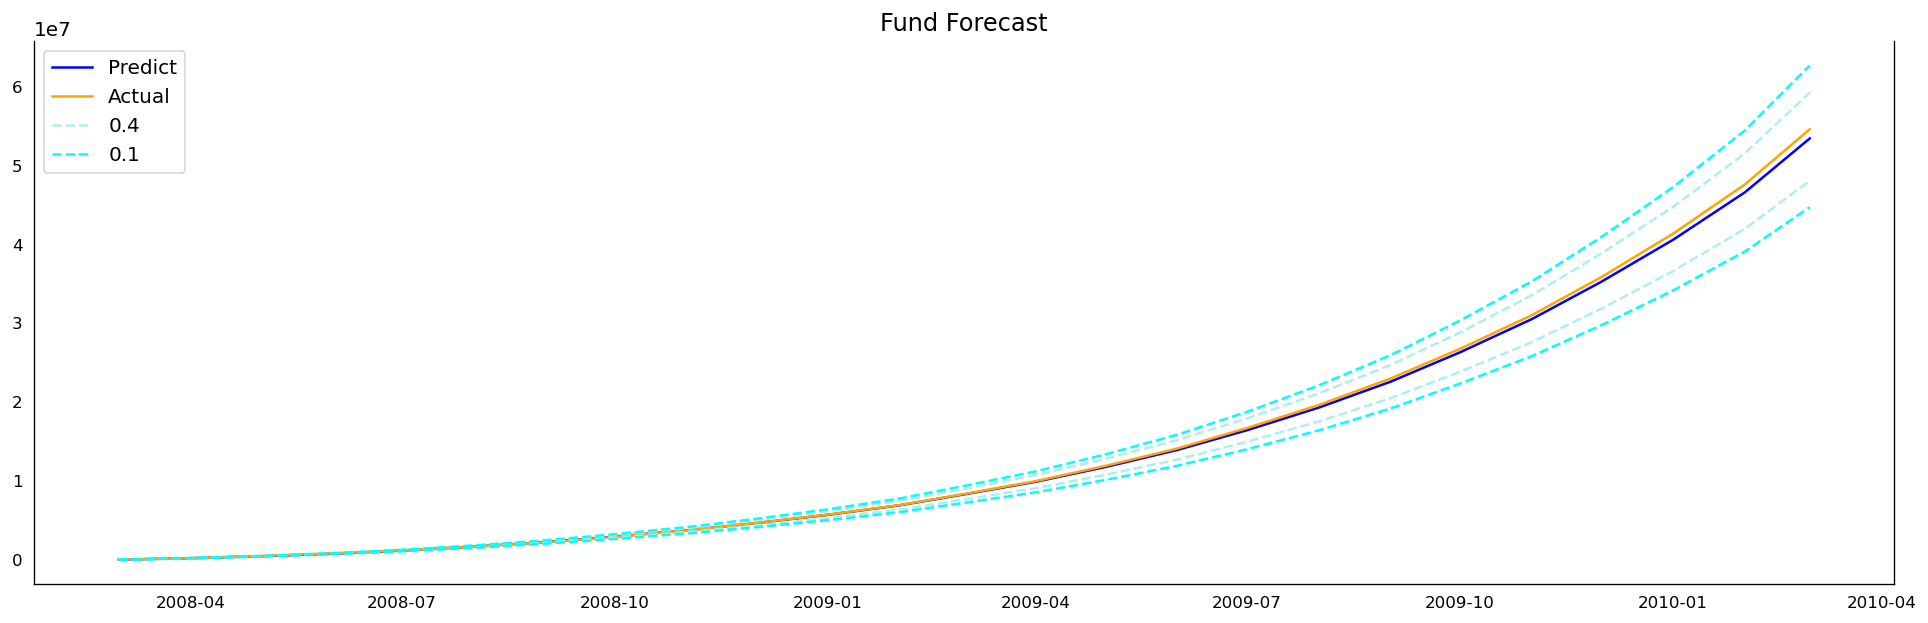

In [23]:
x = forecast_fund_value(best_results_detailed, period = 'During GFC', interval = True)
plot_fund_forecast(x, 'During GFC')

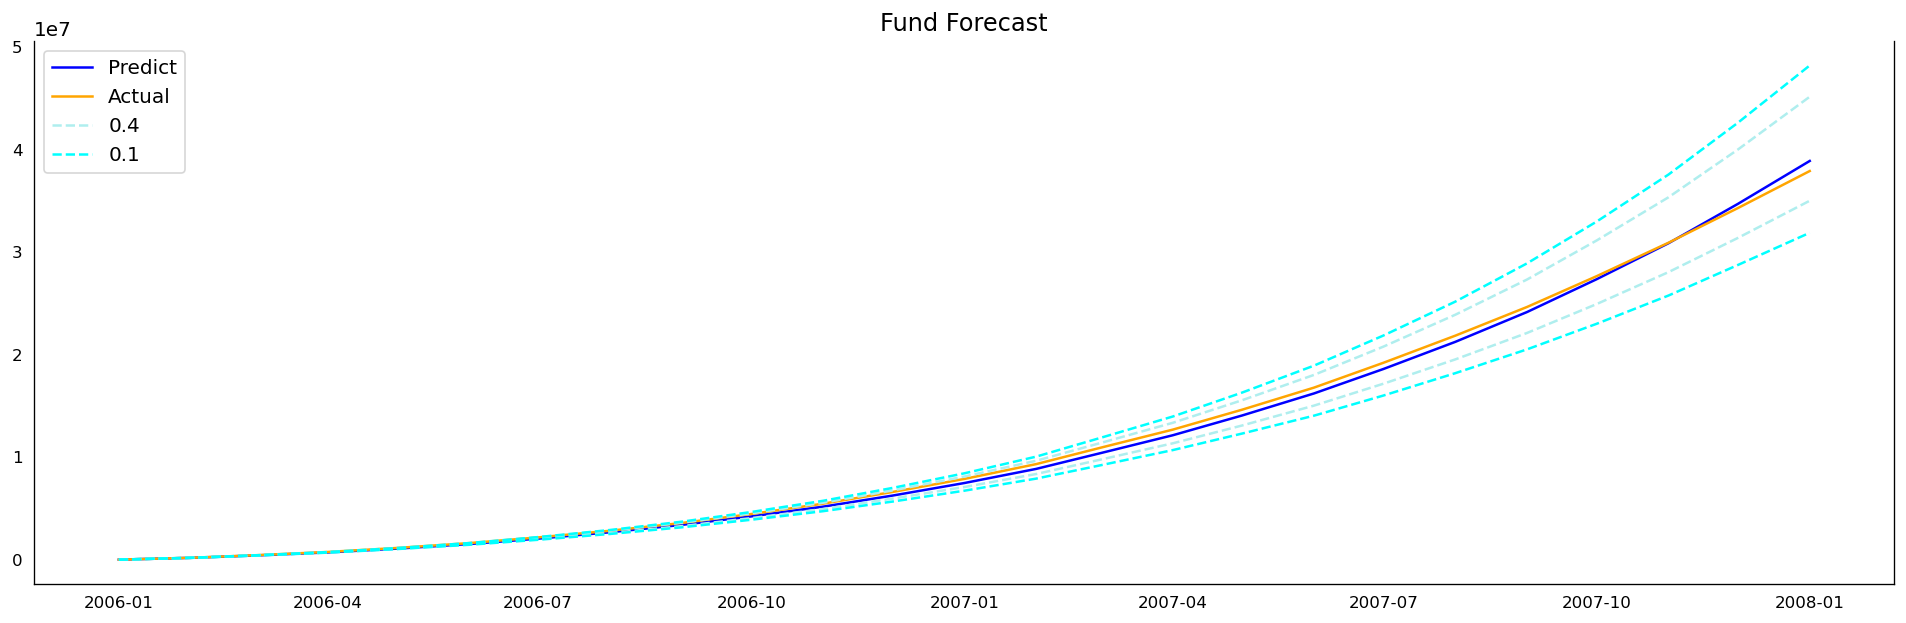

In [24]:
x = forecast_fund_value(best_results_detailed, period = 'Before GFC', interval = True)
plot_fund_forecast(x, 'Before GFC')